## Act 5.7 Neural Net Robot Navigation
##### Pablo Daniel Vargas Cárdenas - A00344869


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder

# Leemos nuestro archivo CSV
column_names = ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'move_direction']
df = pd.read_csv("sensor_readings_4.data", names=column_names, header=None)

## EDA

In [8]:
# Mostramos las primeras filas del DataFrame
# para verificar que se ha leído correctamente
print(df.head())

   sensor1  sensor2  sensor3  sensor4     move_direction
0    1.687    0.445    2.332    0.429  Slight-Right-Turn
1    1.687    0.449    2.332    0.429  Slight-Right-Turn
2    1.687    0.449    2.334    0.429  Slight-Right-Turn
3    1.687    0.449    2.334    0.429  Slight-Right-Turn
4    1.687    0.449    2.334    0.429  Slight-Right-Turn


In [ ]:
#Analizamos los datos de forma superficial
# Mostramos información general del DataFrame
print(df.info())
# Mostramos estadísticas descriptivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sensor1         5456 non-null   float64
 1   sensor2         5456 non-null   float64
 2   sensor3         5456 non-null   float64
 3   sensor4         5456 non-null   float64
 4   move_direction  5456 non-null   object 
dtypes: float64(4), object(1)
memory usage: 213.3+ KB
None
           sensor1      sensor2      sensor3      sensor4
count  5456.000000  5456.000000  5456.000000  5456.000000
mean      1.290307     0.681269     1.881819     1.273689
std       0.626700     0.342594     0.562533     0.821750
min       0.495000     0.340000     0.836000     0.367000
25%       0.826000     0.495000     1.472000     0.788000
50%       1.089500     0.612000     1.753000     1.066500
75%       1.519500     0.753000     2.139000     1.400500
max       5.000000     5.000000     5.000000     5.00000

In [ ]:
# Buscamos valores faltantes en cada columna
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
sensor1           0
sensor2           0
sensor3           0
sensor4           0
move_direction    0
dtype: int64


In [ ]:
# 2. Vemos la cantidad de datos por cada dirección de movimiento
print("\nUnique move directions:", df['move_direction'].unique())
print("\nCount of each move direction:")
print(df['move_direction'].value_counts())


Unique move directions: ['Slight-Right-Turn' 'Sharp-Right-Turn' 'Move-Forward' 'Slight-Left-Turn']

Count of each move direction:
move_direction
Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     826
Slight-Left-Turn      328
Name: count, dtype: int64


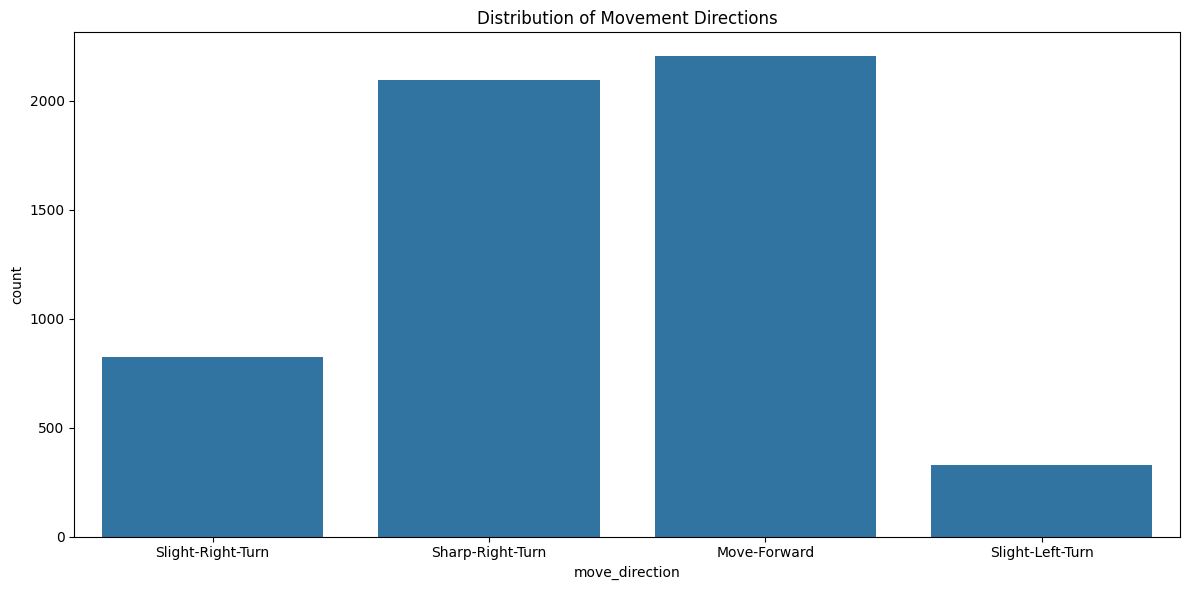

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='move_direction', data=df)
plt.title('Distribution of Movement Directions')
plt.tight_layout()
plt.show()

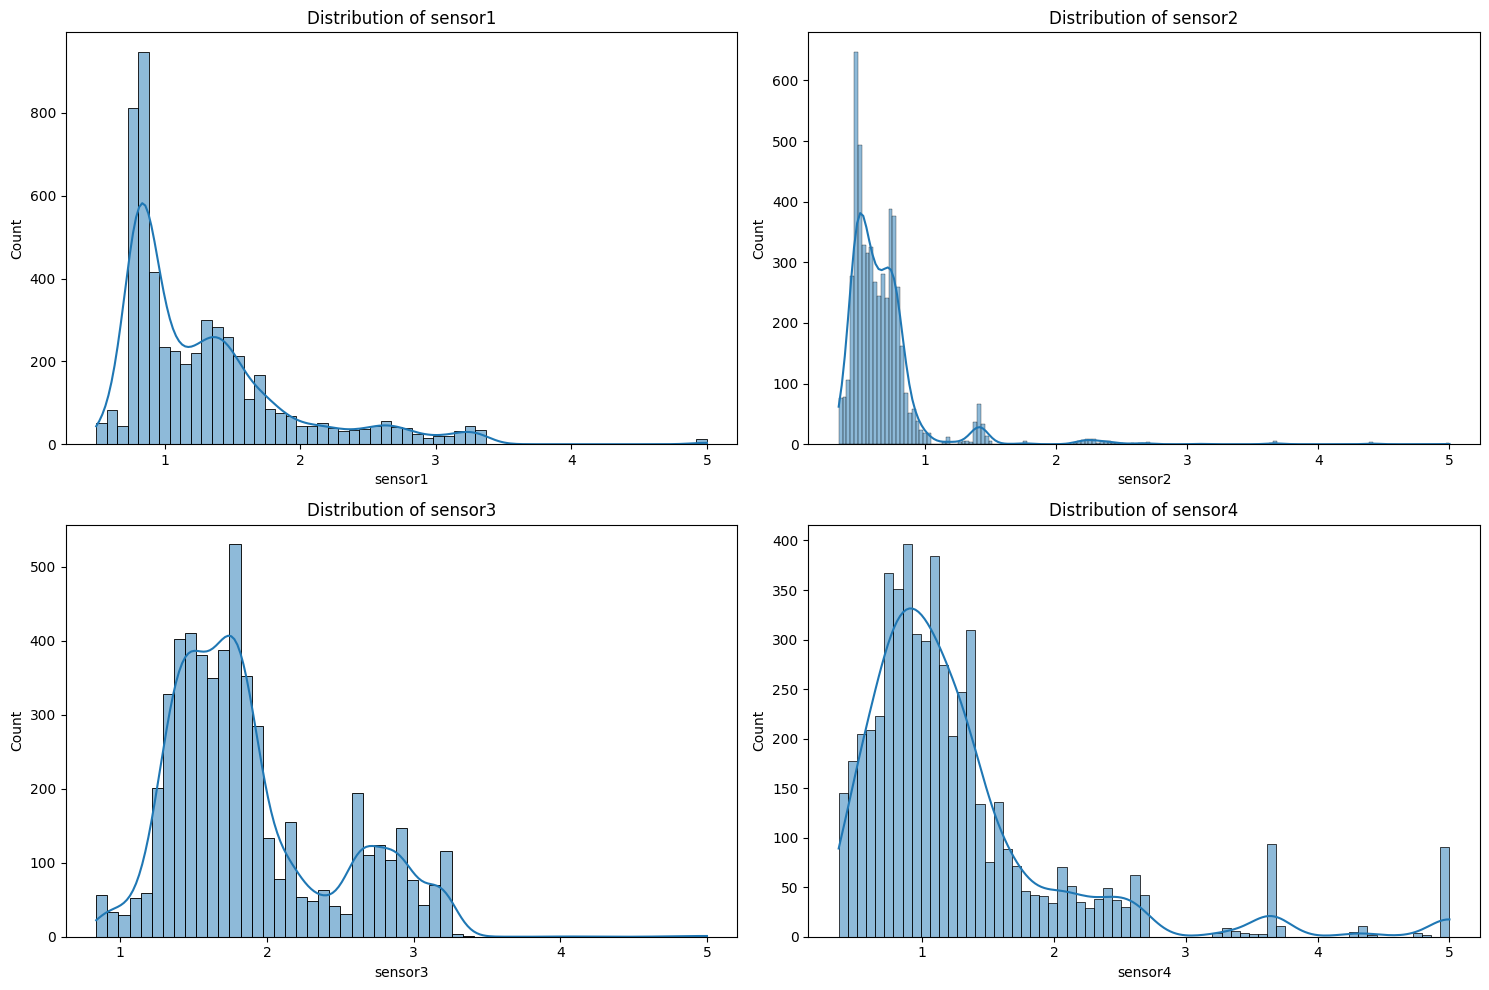

In [17]:
# Analizamos la distribución de los datos de cada sensor
plt.figure(figsize=(15, 10))
for i, sensor in enumerate(['sensor1', 'sensor2', 'sensor3', 'sensor4']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[sensor], kde=True)
    plt.title(f'Distribution of {sensor}')
plt.tight_layout()
plt.show()

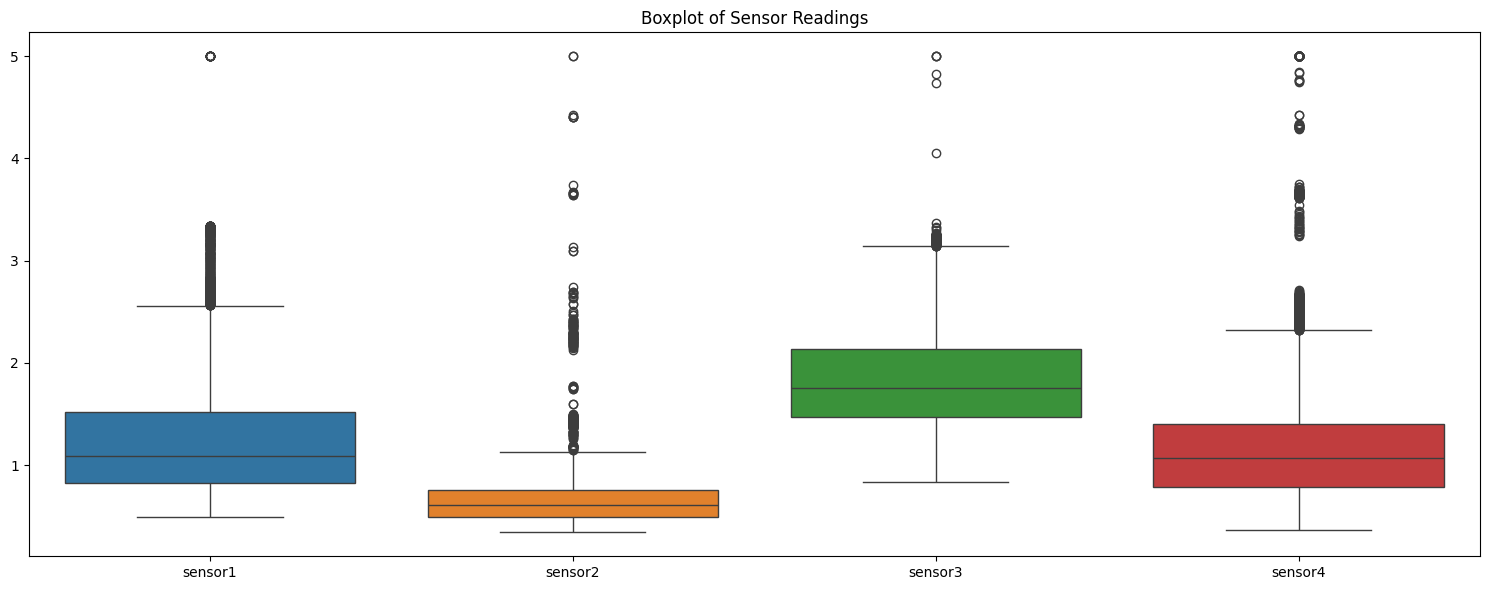

In [18]:
# Boxplots para ver la dispersión de los datos
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['sensor1', 'sensor2', 'sensor3', 'sensor4']])
plt.title('Boxplot of Sensor Readings')
plt.tight_layout()
plt.show()

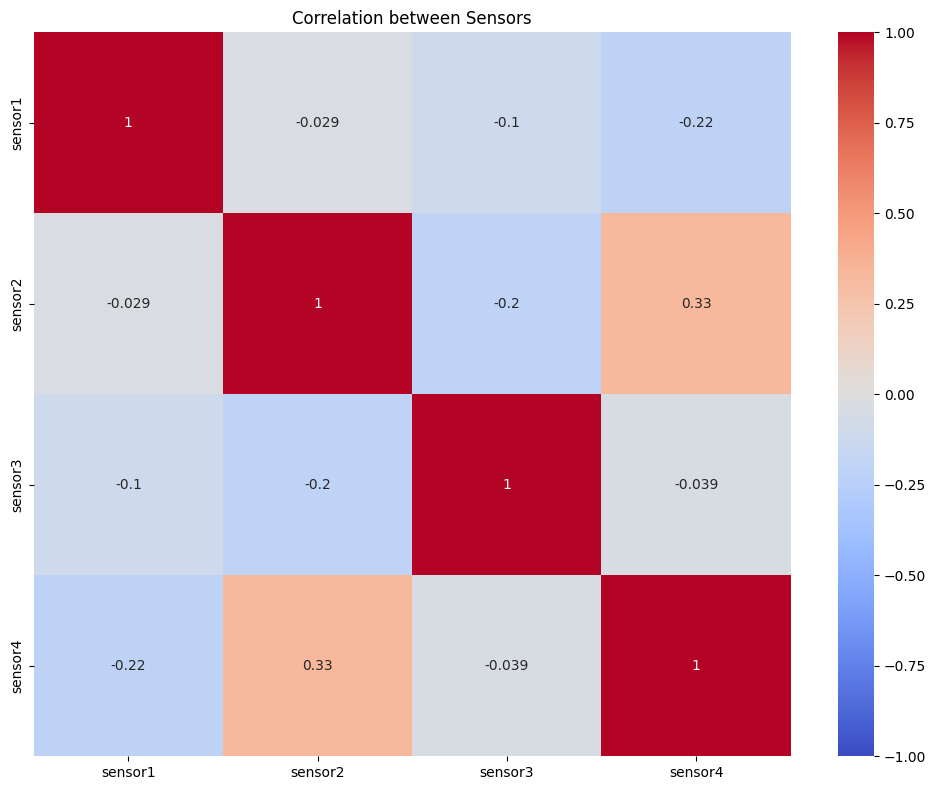

In [19]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sensor_cols = ['sensor1', 'sensor2', 'sensor3', 'sensor4']
corr = df[sensor_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Sensors')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

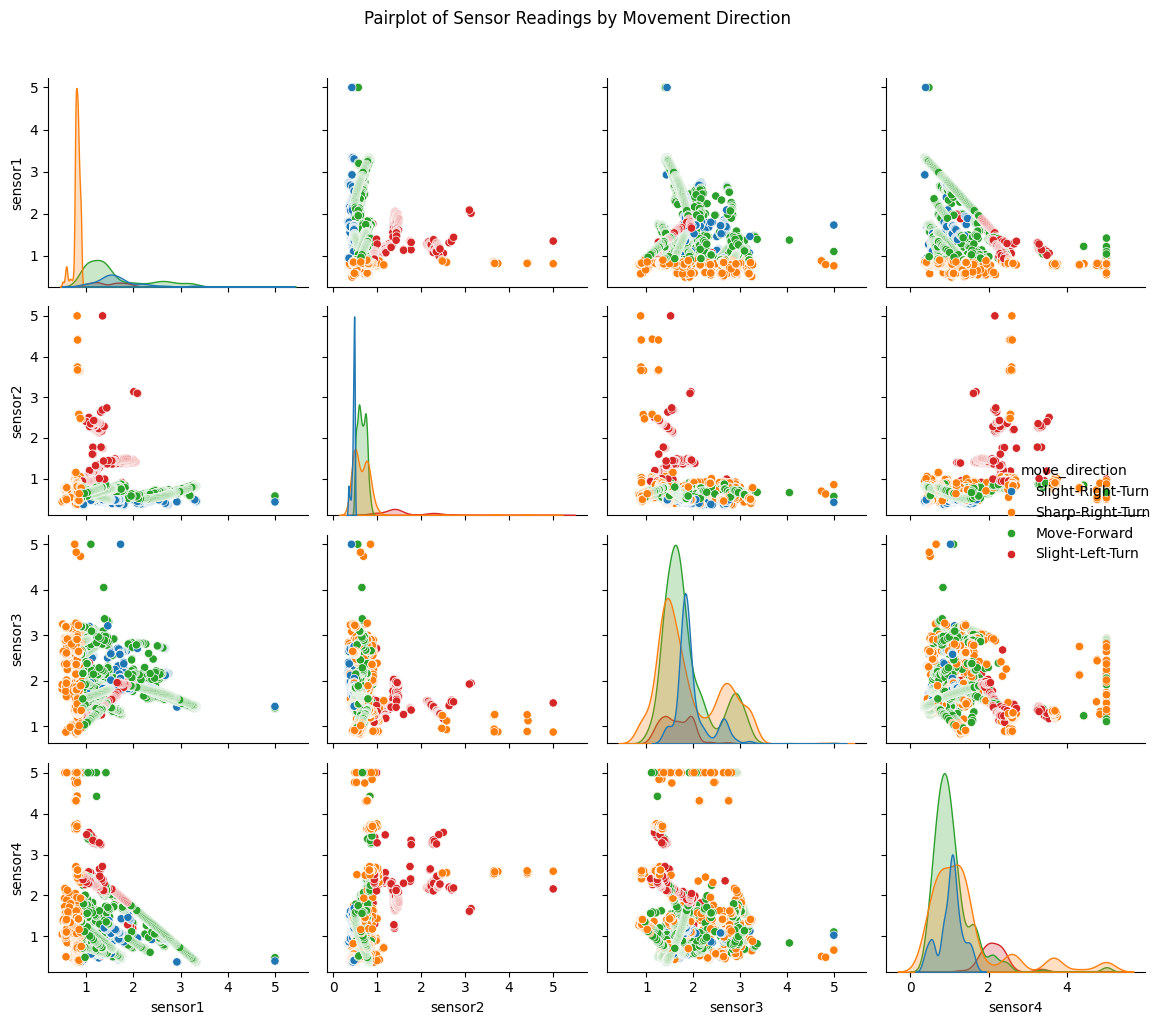

In [ ]:
# 5. Pairplot para ver la relación entre los sensores y la dirección de movimiento
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='move_direction')
plt.suptitle('Pairplot of Sensor Readings by Movement Direction', y=1.02)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [23]:
# 6. Preparación de datos
# Encodificamos la dirección de movimiento si es categórica
if df['move_direction'].dtype == 'object':
    le = LabelEncoder()
    df['move_direction_encoded'] = le.fit_transform(df['move_direction'])
    print("\nEncoded move directions:")
    for i, label in enumerate(le.classes_):
        print(f"{label}: {i}")


Encoded move directions:
Move-Forward: 0
Sharp-Right-Turn: 1
Slight-Left-Turn: 2
Slight-Right-Turn: 3


In [26]:
# Ver como se ven nuestros datos 
X = df[sensor_cols]
if 'move_direction_encoded' in df.columns:
    y = df['move_direction_encoded']
else:
    y = df['move_direction']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (5456, 4)
Target vector shape: (5456,)


## Neural Network para el Dataset

In [27]:
# Data preparation for neural network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

# Check class distribution in train and test sets
print("\nTraining set class distribution:")
if 'move_direction_encoded' in df.columns:
    print(pd.Series(y_train).value_counts(normalize=True))
else:
    print(pd.Series(y_train).value_counts(normalize=True))
    
print("\nTest set class distribution:")
if 'move_direction_encoded' in df.columns:
    print(pd.Series(y_test).value_counts(normalize=True))
else:
    print(pd.Series(y_test).value_counts(normalize=True))

Training set shape: (4364, 4)
Testing set shape: (1092, 4)

Training set class distribution:
move_direction_encoded
0    0.404216
1    0.384280
3    0.151467
2    0.060037
Name: proportion, dtype: float64

Test set class distribution:
move_direction_encoded
0    0.403846
1    0.384615
3    0.151099
2    0.060440
Name: proportion, dtype: float64


Final training set shape: (3491, 4)
Validation set shape: (873, 4)
Iteration 1, loss = 1.38339012
Validation score: 0.610873
Iteration 2, loss = 1.09159693
Validation score: 0.675250
Iteration 3, loss = 0.92926385
Validation score: 0.702432
Iteration 4, loss = 0.79294974
Validation score: 0.712446
Iteration 5, loss = 0.67314952
Validation score: 0.729614
Iteration 6, loss = 0.57067543
Validation score: 0.793991
Iteration 7, loss = 0.48884916
Validation score: 0.856938
Iteration 8, loss = 0.42529049
Validation score: 0.872675
Iteration 9, loss = 0.37672134
Validation score: 0.869814
Iteration 10, loss = 0.33412519
Validation score: 0.881259
Iteration 11, loss = 0.30000903
Validation score: 0.876967
Iteration 12, loss = 0.27290699
Validation score: 0.891273
Iteration 13, loss = 0.25146158
Validation score: 0.921316
Iteration 14, loss = 0.23019315
Validation score: 0.925608
Iteration 15, loss = 0.21324534
Validation score: 0.918455
Iteration 16, loss = 0.19811496
Validation score: 0.93705

/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

Iteration 47, loss = 0.07158892
Validation score: 0.982833
Iteration 48, loss = 0.07101218
Validation score: 0.982833
Iteration 49, loss = 0.07037802
Validation score: 0.981402
Iteration 50, loss = 0.06750956
Validation score: 0.982833
Iteration 51, loss = 0.06589870
Validation score: 0.982833
Iteration 52, loss = 0.06491672
Validation score: 0.981402
Iteration 53, loss = 0.06475108
Validation score: 0.978541
Iteration 54, loss = 0.06630790
Validation score: 0.978541
Iteration 55, loss = 0.06272691
Validation score: 0.981402
Iteration 56, loss = 0.06134201
Validation score: 0.982833
Iteration 57, loss = 0.06241968
Validation score: 0.982833
Iteration 58, loss = 0.06113597
Validation score: 0.981402
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

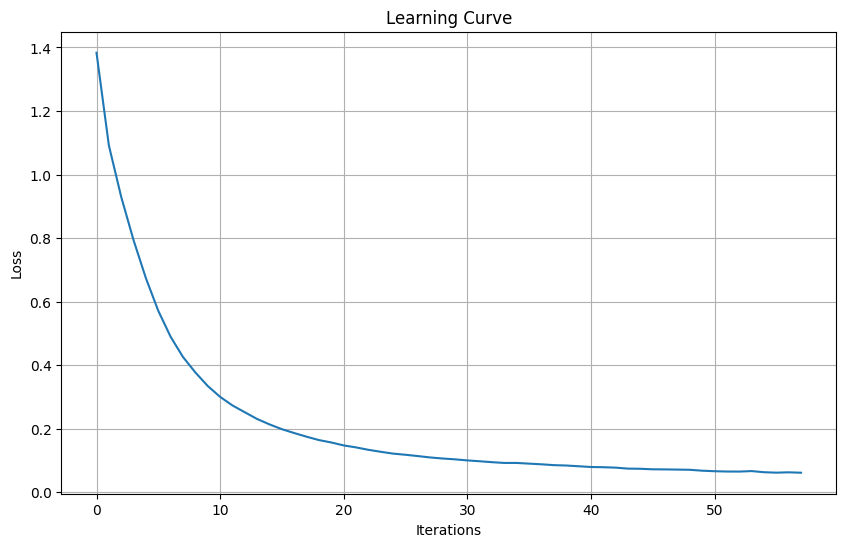


Validation Accuracy: 0.9794

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       353
           1       0.98      0.98      0.98       336
           2       0.98      1.00      0.99        52
           3       0.97      0.98      0.97       132

    accuracy                           0.98       873
   macro avg       0.98      0.98      0.98       873
weighted avg       0.98      0.98      0.98       873


Test Accuracy: 0.9826

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       441
           1       0.99      0.98      0.99       420
           2       0.96      0.97      0.96        66
           3       0.97      1.00      0.99       165

    accuracy                           0.98      1092
   macro avg       0.98      0.98      0.98      1092
weighted avg       0.98      0.98      0.98      1092



/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

<Figure size 1000x800 with 0 Axes>

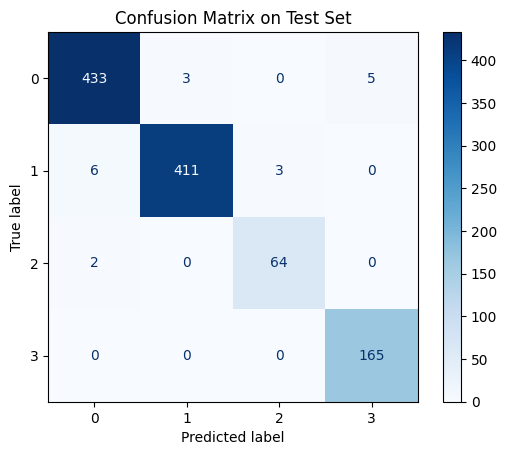

In [28]:
# Neural Network Training and Evaluation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Further split training data to create a validation set
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Final training set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)

# Create and train the neural network model
# Try different architectures with hidden_layer_sizes parameter
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    alpha=0.0001,                  # L2 penalty (regularization term)
    batch_size='auto',             # 'auto' uses min(200, n_samples)
    learning_rate='adaptive',      # Adaptive learning rate
    max_iter=1000,                 # Maximum number of iterations
    early_stopping=True,           # Use early stopping to prevent overfitting
    validation_fraction=0.2,       # Percentage of training data to use for validation
    random_state=42,               # For reproducibility
    verbose=True                   # Print progress messages
)

# Train the model
mlp.fit(X_train_final, y_train_final)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Evaluate on validation set
y_val_pred = mlp.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = mlp.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Set')
plt.show()

Final training set shape: (3491, 4)
Validation set shape: (873, 4)
Iteration 1, loss = 1.38339012
Validation score: 0.610873
Iteration 2, loss = 1.09159693
Validation score: 0.675250
Iteration 3, loss = 0.92926385
Validation score: 0.702432
Iteration 4, loss = 0.79294974
Validation score: 0.712446
Iteration 5, loss = 0.67314952
Validation score: 0.729614
Iteration 6, loss = 0.57067543
Validation score: 0.793991
Iteration 7, loss = 0.48884916
Validation score: 0.856938
Iteration 8, loss = 0.42529049
Validation score: 0.872675
Iteration 9, loss = 0.37672134
Validation score: 0.869814
Iteration 10, loss = 0.33412519
Validation score: 0.881259
Iteration 11, loss = 0.30000903
Validation score: 0.876967
Iteration 12, loss = 0.27290699
Validation score: 0.891273
Iteration 13, loss = 0.25146158
Validation score: 0.921316
Iteration 14, loss = 0.23019315
Validation score: 0.925608
Iteration 15, loss = 0.21324534
Validation score: 0.918455
Iteration 16, loss = 0.19811496
Validation score: 0.93705

/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

Iteration 47, loss = 0.07158892
Validation score: 0.982833
Iteration 48, loss = 0.07101218
Validation score: 0.982833
Iteration 49, loss = 0.07037802
Validation score: 0.981402
Iteration 50, loss = 0.06750956
Validation score: 0.982833
Iteration 51, loss = 0.06589870
Validation score: 0.982833
Iteration 52, loss = 0.06491672
Validation score: 0.981402
Iteration 53, loss = 0.06475108
Validation score: 0.978541
Iteration 54, loss = 0.06630790
Validation score: 0.978541
Iteration 55, loss = 0.06272691
Validation score: 0.981402
Iteration 56, loss = 0.06134201
Validation score: 0.982833
Iteration 57, loss = 0.06241968
Validation score: 0.982833
Iteration 58, loss = 0.06113597
Validation score: 0.981402
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

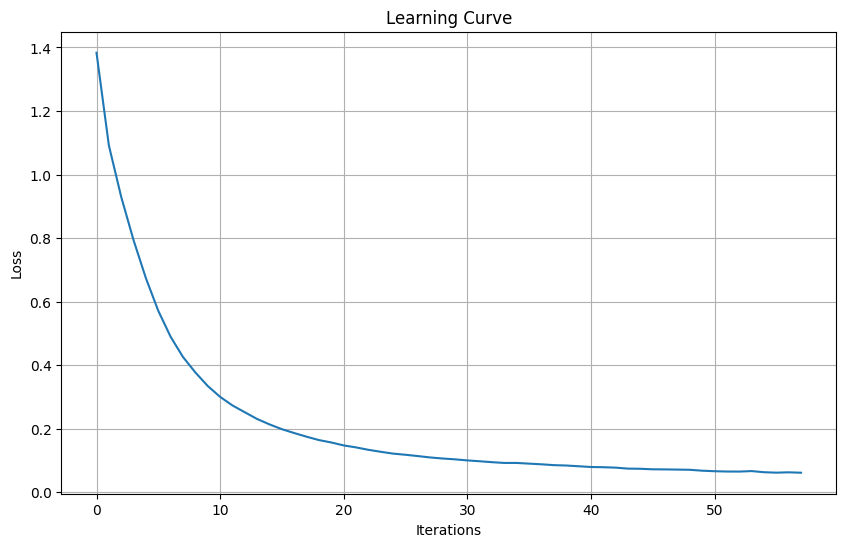


Validation Accuracy: 0.9794

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       353
           1       0.98      0.98      0.98       336
           2       0.98      1.00      0.99        52
           3       0.97      0.98      0.97       132

    accuracy                           0.98       873
   macro avg       0.98      0.98      0.98       873
weighted avg       0.98      0.98      0.98       873


Test Accuracy: 0.9826

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       441
           1       0.99      0.98      0.99       420
           2       0.96      0.97      0.96        66
           3       0.97      1.00      0.99       165

    accuracy                           0.98      1092
   macro avg       0.98      0.98      0.98      1092
weighted avg       0.98      0.98      0.98      1092



/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

<Figure size 1000x800 with 0 Axes>

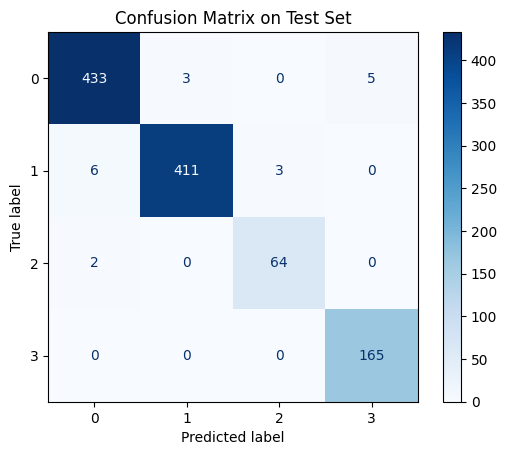

In [ ]:
# Neural Network Training and Evaluation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Further split training data to create a validation set
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Final training set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)

# Create and train the neural network model
# Try different architectures with hidden_layer_sizes parameter
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    alpha=0.0001,                  # L2 penalty (regularization term)
    batch_size='auto',             # 'auto' uses min(200, n_samples)
    learning_rate='adaptive',      # Adaptive learning rate
    max_iter=1000,                 # Maximum number of iterations
    early_stopping=True,           # Use early stopping to prevent overfitting
    validation_fraction=0.2,       # Percentage of training data to use for validation
    random_state=42,               # For reproducibility
    verbose=True                   # Print progress messages
)

# Train the model
mlp.fit(X_train_final, y_train_final)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Evaluate on validation set
y_val_pred = mlp.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = mlp.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Set')
plt.show()

Final training set shape: (3491, 4)
Validation set shape: (873, 4)
Iteration 1, loss = 1.38339012
Validation score: 0.610873
Iteration 2, loss = 1.09159693
Validation score: 0.675250
Iteration 3, loss = 0.92926385
Validation score: 0.702432
Iteration 4, loss = 0.79294974
Validation score: 0.712446
Iteration 5, loss = 0.67314952
Validation score: 0.729614
Iteration 6, loss = 0.57067543
Validation score: 0.793991
Iteration 7, loss = 0.48884916
Validation score: 0.856938
Iteration 8, loss = 0.42529049
Validation score: 0.872675
Iteration 9, loss = 0.37672134
Validation score: 0.869814
Iteration 10, loss = 0.33412519
Validation score: 0.881259
Iteration 11, loss = 0.30000903
Validation score: 0.876967
Iteration 12, loss = 0.27290699
Validation score: 0.891273
Iteration 13, loss = 0.25146158
Validation score: 0.921316
Iteration 14, loss = 0.23019315
Validation score: 0.925608
Iteration 15, loss = 0.21324534
Validation score: 0.918455
Iteration 16, loss = 0.19811496
Validation score: 0.93705

/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

Iteration 47, loss = 0.07158892
Validation score: 0.982833
Iteration 48, loss = 0.07101218
Validation score: 0.982833
Iteration 49, loss = 0.07037802
Validation score: 0.981402
Iteration 50, loss = 0.06750956
Validation score: 0.982833
Iteration 51, loss = 0.06589870
Validation score: 0.982833
Iteration 52, loss = 0.06491672
Validation score: 0.981402
Iteration 53, loss = 0.06475108
Validation score: 0.978541
Iteration 54, loss = 0.06630790
Validation score: 0.978541
Iteration 55, loss = 0.06272691
Validation score: 0.981402
Iteration 56, loss = 0.06134201
Validation score: 0.982833
Iteration 57, loss = 0.06241968
Validation score: 0.982833
Iteration 58, loss = 0.06113597
Validation score: 0.981402
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

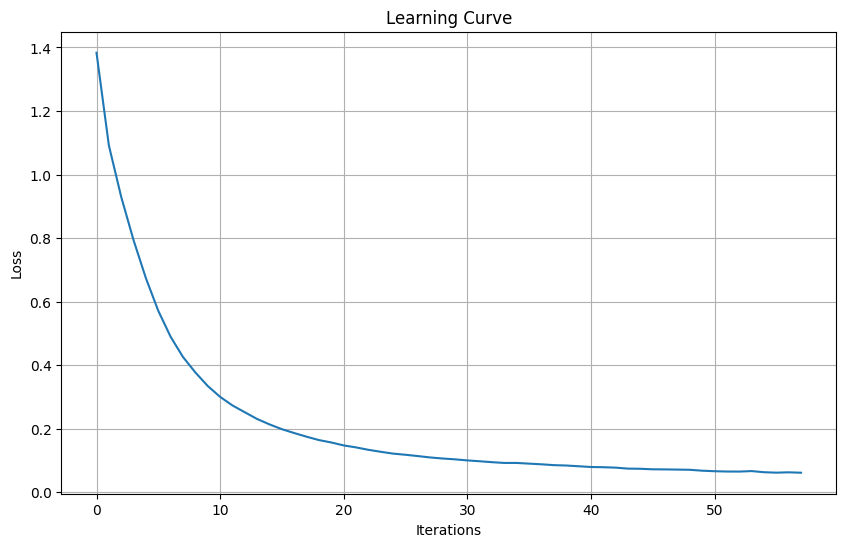


Validation Accuracy: 0.9794

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       353
           1       0.98      0.98      0.98       336
           2       0.98      1.00      0.99        52
           3       0.97      0.98      0.97       132

    accuracy                           0.98       873
   macro avg       0.98      0.98      0.98       873
weighted avg       0.98      0.98      0.98       873


Test Accuracy: 0.9826

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       441
           1       0.99      0.98      0.99       420
           2       0.96      0.97      0.96        66
           3       0.97      1.00      0.99       165

    accuracy                           0.98      1092
   macro avg       0.98      0.98      0.98      1092
weighted avg       0.98      0.98      0.98      1092



/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

<Figure size 1000x800 with 0 Axes>

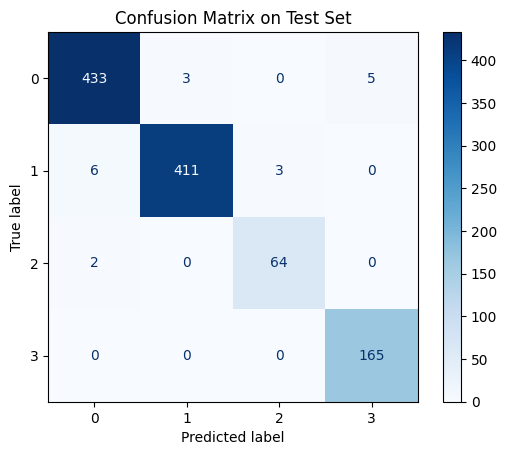

In [ ]:
# Neural Network Training and Evaluation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Further split training data to create a validation set
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Final training set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)

# Create and train the neural network model
# Try different architectures with hidden_layer_sizes parameter
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    alpha=0.0001,                  # L2 penalty (regularization term)
    batch_size='auto',             # 'auto' uses min(200, n_samples)
    learning_rate='adaptive',      # Adaptive learning rate
    max_iter=1000,                 # Maximum number of iterations
    early_stopping=True,           # Use early stopping to prevent overfitting
    validation_fraction=0.2,       # Percentage of training data to use for validation
    random_state=42,               # For reproducibility
    verbose=True                   # Print progress messages
)

# Train the model
mlp.fit(X_train_final, y_train_final)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Evaluate on validation set
y_val_pred = mlp.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = mlp.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Set')
plt.show()

Final training set shape: (3491, 4)
Validation set shape: (873, 4)
Iteration 1, loss = 1.38339012
Validation score: 0.610873
Iteration 2, loss = 1.09159693
Validation score: 0.675250
Iteration 3, loss = 0.92926385
Validation score: 0.702432
Iteration 4, loss = 0.79294974
Validation score: 0.712446
Iteration 5, loss = 0.67314952
Validation score: 0.729614
Iteration 6, loss = 0.57067543
Validation score: 0.793991
Iteration 7, loss = 0.48884916
Validation score: 0.856938
Iteration 8, loss = 0.42529049
Validation score: 0.872675
Iteration 9, loss = 0.37672134
Validation score: 0.869814
Iteration 10, loss = 0.33412519
Validation score: 0.881259
Iteration 11, loss = 0.30000903
Validation score: 0.876967
Iteration 12, loss = 0.27290699
Validation score: 0.891273
Iteration 13, loss = 0.25146158
Validation score: 0.921316
Iteration 14, loss = 0.23019315
Validation score: 0.925608
Iteration 15, loss = 0.21324534
Validation score: 0.918455
Iteration 16, loss = 0.19811496
Validation score: 0.93705

/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

Iteration 47, loss = 0.07158892
Validation score: 0.982833
Iteration 48, loss = 0.07101218
Validation score: 0.982833
Iteration 49, loss = 0.07037802
Validation score: 0.981402
Iteration 50, loss = 0.06750956
Validation score: 0.982833
Iteration 51, loss = 0.06589870
Validation score: 0.982833
Iteration 52, loss = 0.06491672
Validation score: 0.981402
Iteration 53, loss = 0.06475108
Validation score: 0.978541
Iteration 54, loss = 0.06630790
Validation score: 0.978541
Iteration 55, loss = 0.06272691
Validation score: 0.981402
Iteration 56, loss = 0.06134201
Validation score: 0.982833
Iteration 57, loss = 0.06241968
Validation score: 0.982833
Iteration 58, loss = 0.06113597
Validation score: 0.981402
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

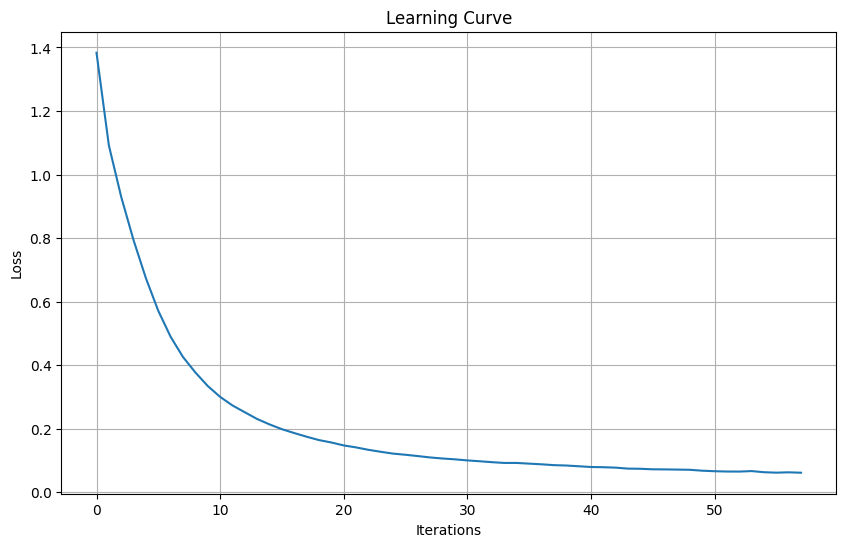


Validation Accuracy: 0.9794

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       353
           1       0.98      0.98      0.98       336
           2       0.98      1.00      0.99        52
           3       0.97      0.98      0.97       132

    accuracy                           0.98       873
   macro avg       0.98      0.98      0.98       873
weighted avg       0.98      0.98      0.98       873


Test Accuracy: 0.9826

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       441
           1       0.99      0.98      0.99       420
           2       0.96      0.97      0.96        66
           3       0.97      1.00      0.99       165

    accuracy                           0.98      1092
   macro avg       0.98      0.98      0.98      1092
weighted avg       0.98      0.98      0.98      1092



/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

<Figure size 1000x800 with 0 Axes>

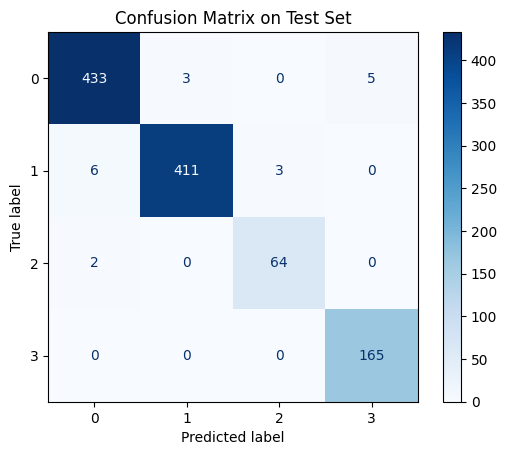

In [ ]:
# Neural Network Training and Evaluation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Further split training data to create a validation set
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Final training set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)

# Create and train the neural network model
# Try different architectures with hidden_layer_sizes parameter
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    alpha=0.0001,                  # L2 penalty (regularization term)
    batch_size='auto',             # 'auto' uses min(200, n_samples)
    learning_rate='adaptive',      # Adaptive learning rate
    max_iter=1000,                 # Maximum number of iterations
    early_stopping=True,           # Use early stopping to prevent overfitting
    validation_fraction=0.2,       # Percentage of training data to use for validation
    random_state=42,               # For reproducibility
    verbose=True                   # Print progress messages
)

# Train the model
mlp.fit(X_train_final, y_train_final)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Evaluate on validation set
y_val_pred = mlp.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = mlp.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Set')
plt.show()

Final training set shape: (3491, 4)
Validation set shape: (873, 4)
Iteration 1, loss = 1.38339012
Validation score: 0.610873
Iteration 2, loss = 1.09159693
Validation score: 0.675250
Iteration 3, loss = 0.92926385
Validation score: 0.702432
Iteration 4, loss = 0.79294974
Validation score: 0.712446
Iteration 5, loss = 0.67314952
Validation score: 0.729614
Iteration 6, loss = 0.57067543
Validation score: 0.793991
Iteration 7, loss = 0.48884916
Validation score: 0.856938
Iteration 8, loss = 0.42529049
Validation score: 0.872675
Iteration 9, loss = 0.37672134
Validation score: 0.869814
Iteration 10, loss = 0.33412519
Validation score: 0.881259
Iteration 11, loss = 0.30000903
Validation score: 0.876967
Iteration 12, loss = 0.27290699
Validation score: 0.891273
Iteration 13, loss = 0.25146158
Validation score: 0.921316
Iteration 14, loss = 0.23019315
Validation score: 0.925608
Iteration 15, loss = 0.21324534
Validation score: 0.918455
Iteration 16, loss = 0.19811496
Validation score: 0.93705

/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

Iteration 47, loss = 0.07158892
Validation score: 0.982833
Iteration 48, loss = 0.07101218
Validation score: 0.982833
Iteration 49, loss = 0.07037802
Validation score: 0.981402
Iteration 50, loss = 0.06750956
Validation score: 0.982833
Iteration 51, loss = 0.06589870
Validation score: 0.982833
Iteration 52, loss = 0.06491672
Validation score: 0.981402
Iteration 53, loss = 0.06475108
Validation score: 0.978541
Iteration 54, loss = 0.06630790
Validation score: 0.978541
Iteration 55, loss = 0.06272691
Validation score: 0.981402
Iteration 56, loss = 0.06134201
Validation score: 0.982833
Iteration 57, loss = 0.06241968
Validation score: 0.982833
Iteration 58, loss = 0.06113597
Validation score: 0.981402
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

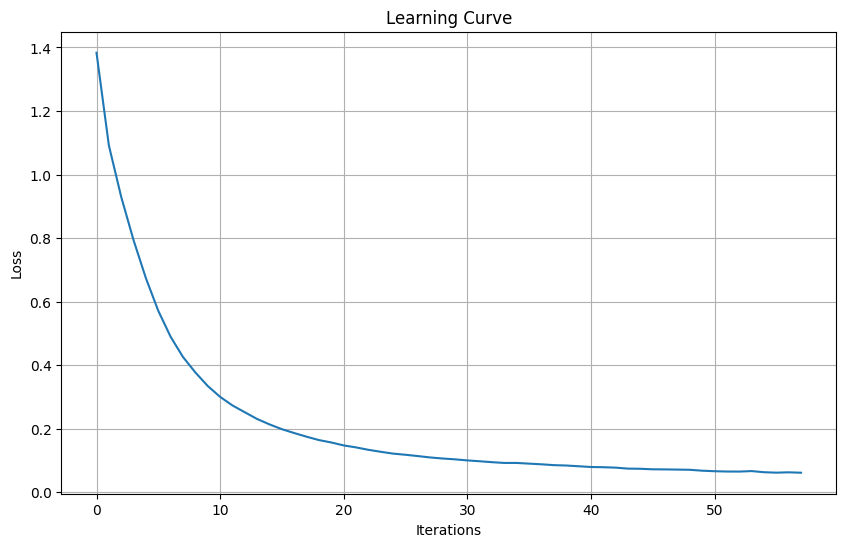


Validation Accuracy: 0.9794

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       353
           1       0.98      0.98      0.98       336
           2       0.98      1.00      0.99        52
           3       0.97      0.98      0.97       132

    accuracy                           0.98       873
   macro avg       0.98      0.98      0.98       873
weighted avg       0.98      0.98      0.98       873


Test Accuracy: 0.9826

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       441
           1       0.99      0.98      0.99       420
           2       0.96      0.97      0.96        66
           3       0.97      1.00      0.99       165

    accuracy                           0.98      1092
   macro avg       0.98      0.98      0.98      1092
weighted avg       0.98      0.98      0.98      1092



/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

<Figure size 1000x800 with 0 Axes>

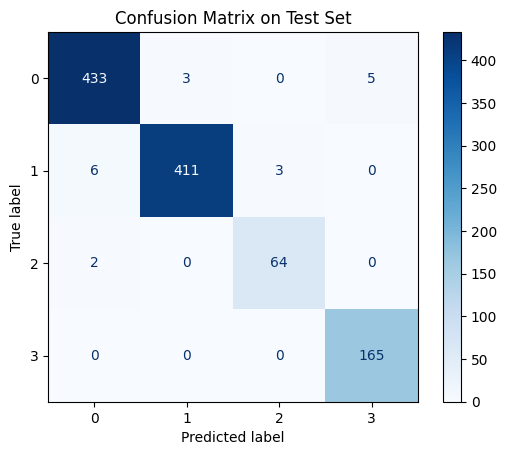

In [ ]:
# Neural Network Training and Evaluation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Further split training data to create a validation set
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Final training set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)

# Create and train the neural network model
# Try different architectures with hidden_layer_sizes parameter
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    alpha=0.0001,                  # L2 penalty (regularization term)
    batch_size='auto',             # 'auto' uses min(200, n_samples)
    learning_rate='adaptive',      # Adaptive learning rate
    max_iter=1000,                 # Maximum number of iterations
    early_stopping=True,           # Use early stopping to prevent overfitting
    validation_fraction=0.2,       # Percentage of training data to use for validation
    random_state=42,               # For reproducibility
    verbose=True                   # Print progress messages
)

# Train the model
mlp.fit(X_train_final, y_train_final)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Evaluate on validation set
y_val_pred = mlp.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = mlp.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Set')
plt.show()

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=42, early_stopping=True),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Get the best model
best_mlp = grid_search.best_estimator_

# Evaluate the best model on test set
y_test_pred_best = best_mlp.predict(X_test_scaled)
best_test_accuracy = accuracy_score(y_test, y_test_pred_best)
print(f"\nBest Model Test Accuracy: {best_test_accuracy:.4f}")
print("\nBest Model Test Classification Report:")
print(classification_report(y_test, y_test_pred_best))

In [31]:
# Function for making predictions on new data
def predict_movement(sensors_data, model, scaler, label_encoder=None):
    """
    Make movement predictions based on sensor readings
    
    Args:
        sensors_data: Array of sensor readings [sensor1, sensor2, sensor3, sensor4]
        model: Trained MLPClassifier model
        scaler: Fitted StandardScaler
        label_encoder: LabelEncoder if target was encoded
        
    Returns:
        Predicted movement direction
    """
    # Ensure input is properly shaped
    if len(sensors_data.shape) == 1:
        sensors_data = sensors_data.reshape(1, -1)
    
    # Scale the input data
    scaled_data = scaler.transform(sensors_data)
    
    # Make prediction
    prediction = model.predict(scaled_data)
    
    # Decode if necessary
    if label_encoder is not None:
        prediction = label_encoder.inverse_transform(prediction)
        
    return prediction[0]

# Example usage
# Assuming the first test instance as a "new" observation
sample_sensors = X_test.iloc[0].values.reshape(1, -1)

le = None
if 'move_direction_encoded' in df.columns:
    le = LabelEncoder()
    le.fit(df['move_direction'])

predicted_movement = predict_movement(sample_sensors, best_mlp, scaler, le)
actual_movement = y_test.iloc[0]

if le is not None:
    actual_movement = le.inverse_transform([actual_movement])[0]

print(f"\nSample sensor readings: {sample_sensors.flatten()}")
print(f"Predicted movement: {predicted_movement}")
print(f"Actual movement: {actual_movement}")


Sample sensor readings: [1.15  0.559 1.719 1.074]
Predicted movement: Move-Forward
Actual movement: Move-Forward


/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Pablo.Vargas2/Documents/Clases/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
